# Image Captioning Tests

In [1]:
# install requirements
import sys
print('Running in Colab.')
!pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
!git clone https://github.com/salesforce/BLIP
%cd BLIP

Running in Colab.
fatal: destination path 'BLIP' already exists and is not an empty directory.
/Users/ericmckevitt/Desktop/Stuff/Code/Etc./snapsync/BLIP


In [9]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


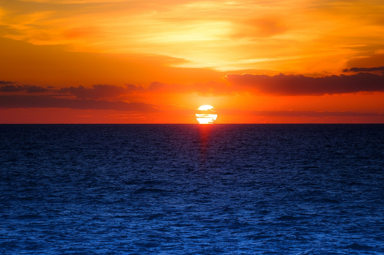

tensor([[[[ 0.7917,  0.7917,  0.7625,  ...,  1.0836,  1.0544,  1.0398],
          [ 0.8792,  0.8647,  0.8355,  ...,  1.0398,  1.0106,  1.0106],
          [ 0.8647,  0.8501,  0.8501,  ...,  1.0690,  1.0544,  1.0398],
          ...,
          [-1.7631, -1.7485, -1.7631,  ..., -1.7193, -1.7485, -1.7631],
          [-1.5587, -1.6901, -1.7047,  ..., -1.4565, -1.5149, -1.6025],
          [-1.6609, -1.7047, -1.7339,  ..., -1.2083, -1.2229, -1.3689]],

         [[-0.0562, -0.0712, -0.0712,  ..., -0.0262, -0.0562, -0.0712],
          [-0.0112, -0.0112, -0.0412,  ..., -0.0562, -0.0562, -0.0862],
          [-0.0262, -0.0262, -0.0262,  ..., -0.0562, -0.0562, -0.0862],
          ...,
          [-1.2418, -1.2718, -1.3169,  ..., -1.0017, -1.1368, -1.1818],
          [-0.7166, -1.0918, -1.0767,  ..., -0.5065, -0.5365, -0.6115],
          [-1.0167, -1.1368, -1.1668,  ..., -0.2663, -0.1913, -0.4764]],

         [[-1.0394, -1.0394, -1.0110,  ..., -1.2100, -1.1816, -1.1674],
          [-1.0252, -1.0394, -

In [10]:
def load_image_from_file(image_path, image_size, device):
    """
    Load an image from a relative file path and preprocess it for a model.

    Args:
        image_path (str): The relative path to the image file.
        image_size (int): The size to which the image will be resized (image_size x image_size).
        device (torch.device): The device to which the image tensor will be sent.

    Returns:
        torch.Tensor: The preprocessed image tensor.
    """
    try:
        # Load the image from the relative file path
        raw_image = Image.open(image_path).convert('RGB')   

        # Display the image at a reduced size (optional)
        w, h = raw_image.size
        display(raw_image.resize((w // 5, h // 5)))
        
        # Define the transformation pipeline
        transform = transforms.Compose([
            transforms.Resize((image_size, image_size), interpolation=InterpolationMode.BICUBIC),
            transforms.ToTensor(),
            transforms.Normalize((0.48145466, 0.4578275, 0.40821073), 
                                 (0.26862954, 0.26130258, 0.27577711))
        ]) 

        # Apply the transformations and send to the specified device
        image = transform(raw_image).unsqueeze(0).to(device)
        return image
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}")
    except Exception as e:
        print(f"Error: {e}")

image = load_image_from_file('../img/sunset.jpg', 224, device)
image

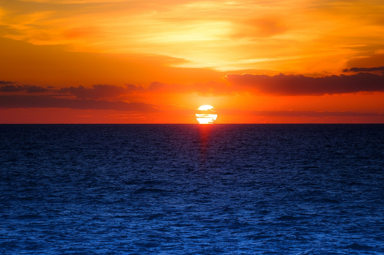

reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: the sun setting over the ocean with a boat in the fore of the sun setting over the ocean with a boat in the water at the horizon


In [ ]:
from models.blip import blip_decoder

image_size = 384
image = load_image_from_file(image_path="../img/IMG_1245.jpg", image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
    
model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    # beam search
    caption = model.generate(image, sample=False, num_beams=3, max_length=50, min_length=10) 
    # nucleus sampling
    # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
    print('caption: '+caption[0])